In [10]:
import pandas as pd
hiring_data = pd.read_csv("hiring.csv")
hiring_data

,exp,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [11]:
hiring_data["exp"] = hiring_data.exp.fillna(0)
hiring_data["test_score"] = hiring_data.test_score.fillna(hiring_data.test_score.median())
hiring_data

,exp,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [12]:
from word2number import w2n
temp = []
for i in hiring_data.exp:
    i = str(i)
    if i.isalpha():
        temp.append(w2n.word_to_num(i))
    else:
        temp.append(int(i))
hiring_data.exp = temp
hiring_data

,exp,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [39]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()
X = hiring_data[["exp","test_score","interview_score"]]
Y = hiring_data["salary"]
regr.fit(X,Y)
to_pred = [[3,6.0,10]]
print(regr.predict(to_pred))
regr.score(X,Y)

[62000]


E:\Anzconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anzconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

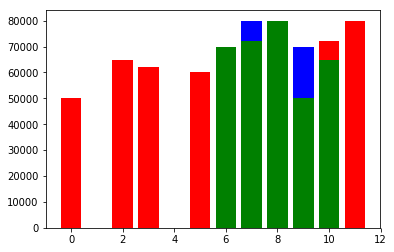

In [23]:
from matplotlib import pyplot as plt
plt.bar(X.iloc[:,0],Y, color='red')
plt.bar(X.iloc[:,1],Y, color='blue')
plt.bar(X.iloc[:,2],Y, color='green')

plt.show()

### Linear Regression


In [108]:
import pandas as pd
startup_data = pd.read_csv("Dataset/50_Startups.csv")

startup_data = startup_data.drop("State", axis = 1)
RD_mean = startup_data[startup_data["R&D Spend"] !=0 ]["R&D Spend"].mean()
startup_data["R&D Spend"].replace(0,RD_mean,inplace = True)

MS_mean = startup_data[startup_data["Marketing Spend"] !=0 ]["Marketing Spend"].mean()
startup_data["Marketing Spend"].replace(0,RD_mean,inplace = True)

from sklearn.linear_model import LinearRegression
reggr = LinearRegression()
X = startup_data.iloc[:,:-1].values
Y = startup_data.iloc[:,-1:].values
reggr.fit(X,Y)
reggr.predict([[2000,130000,2400]])


array([[43595.81233389]])